In [1]:
import torch
import os
import glob
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from model_dev.solver import test

### Testing

In [2]:
# Define path for input images and annotation file
input_path = './new_dataset/Images'
updated_ann_path = './new_dataset/Annotations/updated_annotation.json'

input_data = glob.glob(os.path.join(os.path.abspath(input_path), "*.jpeg"))

In [3]:
# Split data into train and test data
train_data, test_data = train_test_split(input_data, test_size=0.2, random_state=0)

In [4]:
# Path for the trained model to be tested
model_path = "./model_best.pth"

In [5]:
# Run testing
y_pred, y_true = test(test_data, updated_ann_path, model_path=model_path, batch_size=16)

  0%|          | 0/11 [00:00<?, ?it/s]

Test Accuracy:  0.6227544910179641
Test Recall:  0.7479531927542252


### Plot

In [6]:
# Print result
target_names = ['scratch', 'dent', 'rim', 'other']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     scratch       0.48      0.66      0.56        47
        dent       0.67      0.63      0.65        59
         rim       0.80      0.76      0.78        42
       other       0.50      0.21      0.30        19

    accuracy                           0.62       167
   macro avg       0.61      0.56      0.57       167
weighted avg       0.63      0.62      0.62       167



In [7]:
# Result is a dictionary
target_names = ['scratch', 'dent', 'rim', 'other']
result = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
print(result)

{'scratch': {'precision': 0.484375, 'recall': 0.6595744680851063, 'f1-score': 0.5585585585585585, 'support': 47}, 'dent': {'precision': 0.6727272727272727, 'recall': 0.6271186440677966, 'f1-score': 0.6491228070175439, 'support': 59}, 'rim': {'precision': 0.8, 'recall': 0.7619047619047619, 'f1-score': 0.7804878048780488, 'support': 42}, 'other': {'precision': 0.5, 'recall': 0.21052631578947367, 'f1-score': 0.2962962962962963, 'support': 19}, 'accuracy': 0.6227544910179641, 'macro avg': {'precision': 0.6142755681818182, 'recall': 0.5647810474617847, 'f1-score': 0.5711163666876118, 'support': 167}, 'weighted avg': {'precision': 0.6320750544365813, 'recall': 0.6227544910179641, 'f1-score': 0.6165306305436828, 'support': 167}}


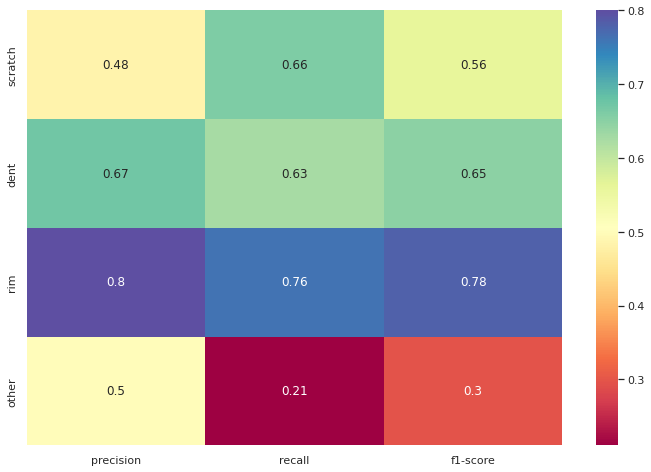

In [8]:
# Plot
sns.set(rc={'figure.figsize':(12, 8)})
model_plot = sns.heatmap(pd.DataFrame(result).iloc[:-1, :4].T, annot=True, cmap="Spectral")

# Save figure
model_plot.figure.savefig("Model_Statistics.png", dpi=300)